# Tree-Based Regression Methods for 3D Sinusoidal Data

## Name: Ghulam Shah

## Directions and Overview

The main purpose of this project is to showcase tree-based methods to solve regression problems.  In this project, I will fit a `Gradient-Boosted Regression Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 3D sinusoidal data set.  Since these models can be trained very quickly on the supplied data, I will first manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, I will manually sweep the hyperparameter space and try to hone in on the optimal hyperparameter values, again, _manually_. (That means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

But wait, there's more! Merely attempting to identify the optimal hyperparameter values is not enough. I will be sure to really get a visceral understanding of how altering a hyperparameter in turn alters the model predictions (i.e. the prediction curve). This is one way to build my machine learning intuition!

Next, I will perform several grid searches, in order to compare my "optimal" hyperparameter values with those computed from the grid search.

Accordingly, I will visualize model predictions for the optimal `Gradient-Boosted Regression Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches. Finally, I will compute the generalization error on the test set for the three models.

## Preliminaries

Let's import some common packages:

In [2]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(data_df):
    df = data_df
    
    # Creating subplot identifiers
    fig = plt.figure(figsize=(12, 10))
    ax1 = fig.add_subplot(221, projection='3d')
    ax2 = fig.add_subplot(222, projection='3d')
    ax3 = fig.add_subplot(223, projection='3d')
    ax4 = fig.add_subplot(224, projection='3d')

    # First subplot with edits
    plt.locator_params(axis='x', nbins=10)
    ax1.axis([0, 14, -6, 6])
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.set_zlabel('$z$')
    ax1.xaxis.label.set_color('brown')
    ax1.yaxis.label.set_color('brown')
    ax1.zaxis.label.set_color('brown')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax1.scatter3D(df[0]['x'], df[0]['y'], df[1], marker='o', alpha=.7);

    # Second subplot with edits
    plt.locator_params(axis='x', nbins=10)
    ax2.axis([0, 14, -6, 6])
    ax2.set_xlabel('$x$')
    ax2.set_ylabel('$y$')
    ax2.set_zlabel('$z$')
    ax2.xaxis.label.set_color('brown')
    ax2.yaxis.label.set_color('brown')
    ax2.zaxis.label.set_color('brown')
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax2.scatter3D(df[0]['x'], df[0]['y'], df[1], marker='o', alpha=.7);

    # Third subplot with edits
    plt.locator_params(axis='x', nbins=10)
    ax3.axis([0, 14, -6, 6])
    ax3.set_xlabel('$x$')
    ax3.set_ylabel('$y$')
    ax3.set_zlabel('$z$')
    ax3.xaxis.label.set_color('brown')
    ax3.yaxis.label.set_color('brown')
    ax3.zaxis.label.set_color('brown')
    ax3.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax3.scatter3D(df[0]['x'], df[0]['y'], df[1], marker='o', alpha=.7);

    # Fourth subplot with edits
    plt.locator_params(axis='x', nbins=10)
    ax4.axis([0, 14, -6, 6])
    ax4.set_xlabel('$x$')
    ax4.set_ylabel('$y$')
    ax4.set_zlabel('$z$')
    ax4.xaxis.label.set_color('brown')
    ax4.yaxis.label.set_color('brown')
    ax4.zaxis.label.set_color('brown')
    ax4.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax4.scatter3D(df[0]['x'], df[0]['y'], df[1], marker='o', alpha=.7);

    # Changing the views of the 3d figure of plots
    ax1.view_init(0,89)
    ax2.view_init(45,0)
    ax3.view_init(52,45)
    ax4.view_init(35,25)

    # Presenting and saving the image
    plt.show(save_fig('Image1'))
    
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    
    # Creating subplot identifiers for the second figure
    fig = plt.figure(figsize=(12, 10))
    ax1 = fig.add_subplot(221, projection='3d')
    ax2 = fig.add_subplot(222, projection='3d')
    ax3 = fig.add_subplot(223, projection='3d')
    ax4 = fig.add_subplot(224, projection='3d')

    # First subplot with edits and regression line
    plt.locator_params(axis='x', nbins=10)
    ax1.axis([0, 14, -6, 6])
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.set_zlabel('$z$')
    ax1.xaxis.label.set_color('brown')
    ax1.yaxis.label.set_color('brown')
    ax1.zaxis.label.set_color('brown')
    ax1.scatter3D(X_train['x'], X_train['y'], z_train, marker='o', alpha=.7)
    ax1.plot3D(fit_x, fit_y, fit_z, color='black');
    #ax1.plot3D

    # Second subplot with edits and regression line
    plt.locator_params(axis='x', nbins=10)
    ax2.axis([0, 14, -6, 6])
    ax2.set_xlabel('$x$')
    ax2.set_ylabel('$y$')
    ax2.set_zlabel('$z$')
    ax2.xaxis.label.set_color('brown')
    ax2.yaxis.label.set_color('brown')
    ax2.zaxis.label.set_color('brown')
    ax2.scatter3D(X_train['x'], X_train['y'], z_train, marker='o', alpha=.7)
    ax2.plot3D(fit_x, fit_y, fit_z, color='black');

    # Third subplot with edits and regression line
    plt.locator_params(axis='x', nbins=10)
    ax3.axis([0, 14, -6, 6])
    ax3.set_xlabel('$x$')
    ax3.set_ylabel('$y$')
    ax3.set_zlabel('$z$')
    ax3.xaxis.label.set_color('brown')
    ax3.yaxis.label.set_color('brown')
    ax3.zaxis.label.set_color('brown')
    ax3.scatter3D(X_train['x'], X_train['y'], z_train, marker='o', alpha=.7)
    ax3.plot3D(fit_x, fit_y, fit_z, color='black');

    # Fourth subplot with edits and regression line
    plt.locator_params(axis='x', nbins=10)
    ax4.axis([0, 14, -6, 6])
    ax4.set_xlabel('$x$')
    ax4.set_ylabel('$y$')
    ax4.set_zlabel('$z$')
    ax4.xaxis.label.set_color('brown')
    ax4.yaxis.label.set_color('brown')
    ax4.zaxis.label.set_color('brown')
    ax4.scatter3D(X_train['x'], X_train['y'], z_train, marker='o', alpha=.7)
    ax4.plot3D(fit_x, fit_y, fit_z, color='black');

    # Different views of the second 3D figure
    ax1.view_init(0,89)
    ax2.view_init(45,0)
    ax3.view_init(52,45)
    ax4.view_init(35,25)

    # Presenting and saving the second image of plots
    plt.show(save_fig('Image2'))

# Import and Split Data


Begin by importing the data from the file called `3DSinusoidal.csv`.  Name the returned DataFrame `data`. 

In [3]:
# importing the data
filename = '3DSinusoidal.csv'
data = pd.read_csv(filename) 

# assigning features and targets
###data = data.sort_values('x')
X = data[['x','y']]
z = data['z']

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.20, random_state=42)

# Plot Data

Saving figure Image1


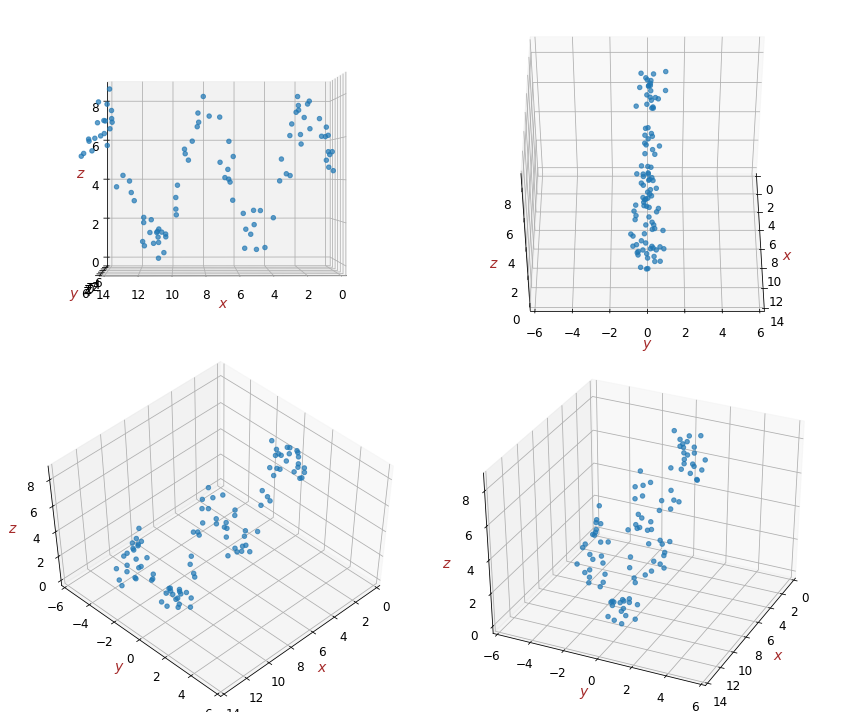

In [4]:
from mpl_toolkits.mplot3d import Axes3D

train_df = (X_train, z_train)
plot3Ddata(train_df)

# Explore 3D Data: GradientBoostingRegressor

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# turning arguments into arrays
fit_x = X_train['x'].to_numpy()
fit_y = X_train['y'].to_numpy()
scat_x = X_train['x'].to_numpy()
scat_y = X_train['y'].to_numpy()
scat_z = z_train.to_numpy()

gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=2)
gbr.fit(X_train, z_train)

fit_z = gbr.predict(X_train)

w=np.argsort(fit_x)
fit_x=fit_x[w]
fit_y=fit_y[w]
fit_z=fit_z[w]

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.


Saving figure Image2


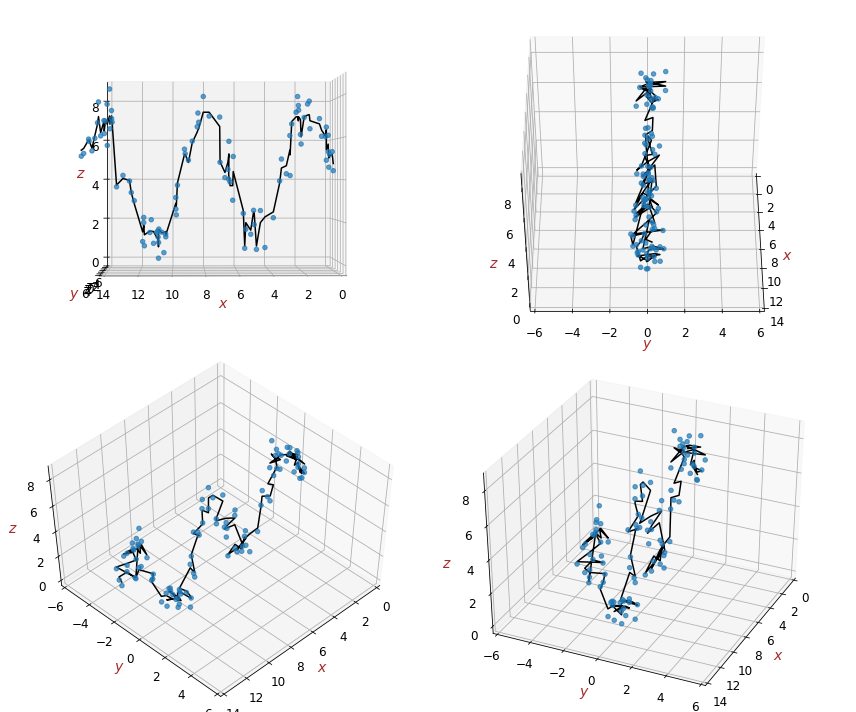

In [6]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Explore 3D Data: RandomForestRegressor

In [7]:
rfr = RandomForestRegressor(random_state=42, n_estimators=600, max_depth=5, min_samples_split=2)
rfr.fit(X_train, z_train)

fit_x = X_train['x'].to_numpy()
fit_y = X_train['y'].to_numpy()

fit_z = rfr.predict(X_train)

w=np.argsort(fit_x)
fit_x=fit_x[w]
fit_y=fit_y[w]
fit_z=fit_z[w]

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.


Saving figure Image2


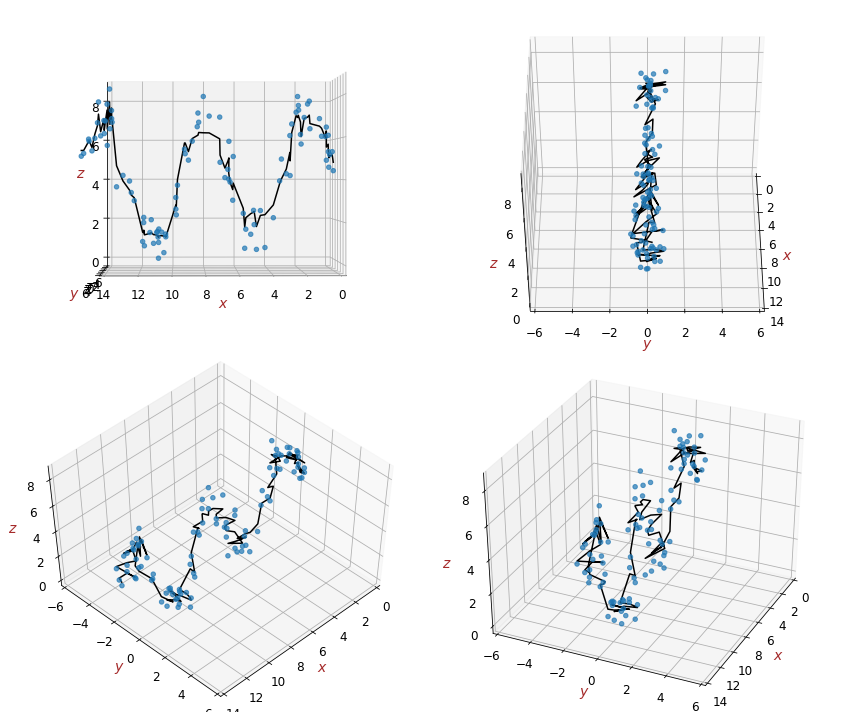

In [8]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Explore 3D Data: DecisionTreeRegressor

In [9]:
dtr = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=4, splitter='best')
dtr.fit(X_train, z_train)

fit_x = X_train['x'].to_numpy()
fit_y = X_train['y'].to_numpy()

fit_z = dtr.predict(X_train)

w=np.argsort(fit_x)
fit_x=fit_x[w]
fit_y=fit_y[w]
fit_z=fit_z[w]

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.


Saving figure Image2


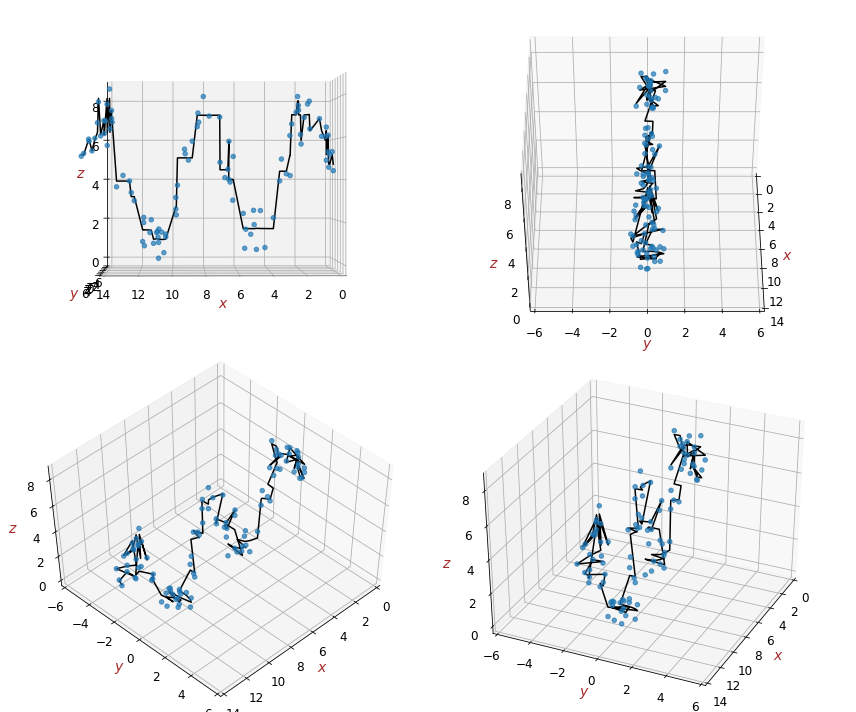

In [10]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Grid Searches

I will perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types. I will be able compare the values computed by the grid search with the values I manually found earlier. 

I will perform a course-grained grid search, with a very broad range of values first. Then, I will perform a second grid search using a tighter range of values centered on those identified in the first grid search. I may have to use another round of grid searching too.

Note the following:

1. Document the optimal hyperparameters in the designated location after obtaining them.

2. Use `random_state=42` everywhere that it is needed in this notebook.

3. Use grid search to compute the following hyperparameters:

   GradientBoostingRegressor:
    
     - `max_depth = <value>`
     - `n_estimators = <value>`
     - `learning_rate = <value>`

   RandomForestRegressor:
    
     - `max_depth = <value>`
     - `n_estimators = <value>`
     - `min_samples_split = <value>`

   DecisionTreeRegressor:
    
     - `splitter = <value>`
     - `max_depth = <value>`
     - `min_samples_split = <value>`
     
     
4. The `learning rate` should be rounded to two decimals.

5. The number of cross-folds. Specify `cv=3`


## Individual Model Grid Searches

In this section I will perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.


In [11]:
from sklearn.model_selection import GridSearchCV

# -----
# Coarse-Grained GradientBoostingRegressor GridSearch
# -----

# creating dictionary
param_grid = {'max_depth' : [1,2,3,4,5,8,16,32], 'n_estimators' : [100,250,500,800,1000,1250,1500],
              'learning_rate' : [.10,.30,.50,.70,1.00]}

# Coarse-Grained GradientBoostingRegressor GridSearch
coarse = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, verbose=1, cv=3)
coarse.fit(X_train, z_train)

print("The best parameters are: ", coarse.best_params_)

Fitting 3 folds for each of 280 candidates, totalling 840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 250}


[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:  1.7min finished


In [12]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

# creating refined dictionary
param_grid_r = {'max_depth' : [0.75,1,1.25,1.5], 'n_estimators' : [125,175,225,250,275,325,375,425,475],
              'learning_rate' : [.35,.40,.45,.50,.55,.60,.65]}

# Refined-Grained GradientBoostingRegressor GridSearch
refined = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=param_grid_r, verbose=1, cv=3)
refined.fit(X_train, z_train)

print("The best parameters are: ", refined.best_params_)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'learning_rate': 0.55, 'max_depth': 1, 'n_estimators': 250}


[Parallel(n_jobs=1)]: Done 756 out of 756 | elapsed:   32.2s finished


In [13]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

# creating final dictionary
param_grid_f = {'max_depth' : [0.9,1,1.1], 'n_estimators' : [230,235,240,245,250,255,260,265,270],
              'learning_rate' : [.51,.52,.53,.54,.55,.56,.57,.58,.59]}

# Final GradientBoostingRegressor GridSearch
final = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=param_grid_f, verbose=1, cv=3)
final.fit(X_train, z_train)

print("The best parameters are: ", final.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'learning_rate': 0.55, 'max_depth': 1, 'n_estimators': 235}


[Parallel(n_jobs=1)]: Done 729 out of 729 | elapsed:   26.4s finished


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = 0.55`
- `max_depth = 1`
- `n_estimators = 235`

In [14]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

# creating randomforest dictionary
param_grid_rfr = {'max_depth' : [2,4,8,16,32], 'n_estimators' : [300,500,875,1000,1250,1500], 
                  'min_samples_split' : [2,5,10,15,20,30]}

# Coarse-Grained RandomForestRegressor GridSearch
coarse_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid_rfr, verbose=1, cv=3)
coarse_rf.fit(X_train, z_train)

print("The best parameters are: ", coarse_rf.best_params_)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  5.9min finished


The best parameters are:  {'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 1250}


In [15]:
# -----
# Refined RandomForestRegressor GridSearch
# -----

# creating refined randomforest dictionary
param_grid_rfr_r = {'max_depth' : [10,13,16,19,22,25,28,31], 'n_estimators' : [1075,1150,1200,1250,1300,1350,1425,1475], 
                  'min_samples_split' : [2,3,4]}

# refined RandomForestRegressor GridSearch
refined_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid_rfr_r, verbose=1, cv=3)
refined_rf.fit(X_train, z_train)

print("The best parameters are: ", refined_rf.best_params_)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed:  9.5min finished


The best parameters are:  {'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 1075}


In [16]:
# -----
# Final RandomForestRegressor GridSearch
# -----

# creating final randomforest dictionary
param_grid_rfr_f = {'max_depth' : [14,15,16,17,18], 'n_estimators' : [1025,1050,1065,1075,1085,1100,1115,1125,1135,1150], 
                  'min_samples_split' : [2]}

# Coarse-Grained RandomForestRegressor GridSearch
final_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid_rfr_f, verbose=1, cv=3)
final_rf.fit(X_train, z_train)

print("The best parameters are: ", final_rf.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.0min finished


The best parameters are:  {'max_depth': 14, 'min_samples_split': 2, 'n_estimators': 1125}


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = 14`
- `n_estimators = 1125`
- `min_samples_split = 2`

In [17]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

# creating DecisionTree dictionary
param_grid_dt = {'max_depth' : [1,2,4,8,16,32], 'splitter' : ['best','random'], 
                  'min_samples_split' : [2,5,10,15,20,25,30]}

# Coarse-Grained DecisionTreeRegressor GridSearch
coarse_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=param_grid_dt, verbose=1, cv=3)
coarse_dt.fit(X_train, z_train)

print("The best parameters are: ", coarse_dt.best_params_)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 8, 'min_samples_split': 10, 'splitter': 'best'}


[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:    0.7s finished


In [18]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

# creating final DecisionTree dictionary
param_grid_dt_r = {'max_depth' : [5,6,7,8,9,10,11,12,13,14,15], 'splitter' : ['best'], 
                  'min_samples_split' : [6,7,8,9,10,11,12,13,14]}

# refined DecisionTreeRegressor GridSearch
refined_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=param_grid_dt_r, verbose=1, cv=3)
refined_dt.fit(X_train, z_train)

print("The best parameters are: ", refined_dt.best_params_)

Fitting 3 folds for each of 99 candidates, totalling 297 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 7, 'min_samples_split': 10, 'splitter': 'best'}


[Parallel(n_jobs=1)]: Done 297 out of 297 | elapsed:    0.9s finished


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `splitter = best`
- `max_depth = 7`
- `min_samples_split = 10`

# Visualize Optimal Model Predictions

In the previous section I performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, I will use the `best_params_` attribute of the grid search objects from above to create the three optimal models below.  For each model, we will visualize the models predictions on the training set - this is what is meant by the "prediction curve" of the model.

### Create Optimal GradientBoostingRegressor Model

In [19]:
# instantiating new optimal GradientBoostingRegressor model with best parameter attributes
optimal_gbr = GradientBoostingRegressor(random_state=42, max_depth = final.best_params_['max_depth'], 
                                        n_estimators = final.best_params_['n_estimators'],
                                        learning_rate = round(final.best_params_['learning_rate'],2))

fit_x = X_train['x'].to_numpy()
fit_y = X_train['y'].to_numpy()

# fitting the new optimal model
optimal_gbr.fit(X_train, z_train)
fit_z = optimal_gbr.predict(X_train)

w=np.argsort(fit_x)
fit_x=fit_x[w]
fit_y=fit_y[w]
fit_z=fit_z[w]

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

Saving figure Image2


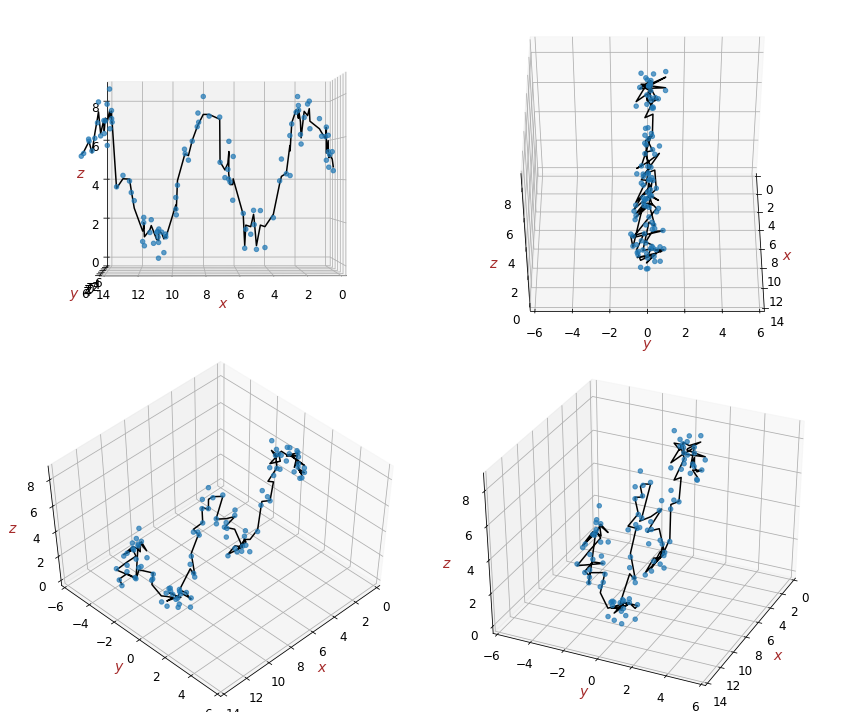

In [20]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

### Create Optimal RandomForestRegressor Model

In [21]:
# instantiating new optimal RandomForestRegressor model with best parameter attributes
optimal_rfr = RandomForestRegressor(random_state=42, max_depth = final_rf.best_params_['max_depth'], 
                                        n_estimators = final_rf.best_params_['n_estimators'],
                                        min_samples_split = final_rf.best_params_['min_samples_split'])

fit_x = X_train['x'].to_numpy()
fit_y = X_train['y'].to_numpy()

# fitting the new optimal model
optimal_rfr.fit(X_train, z_train) 
fit_z = optimal_rfr.predict(X_train)

w=np.argsort(fit_x)
fit_x=fit_x[w]
fit_y=fit_y[w]
fit_z=fit_z[w]

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

Saving figure Image2


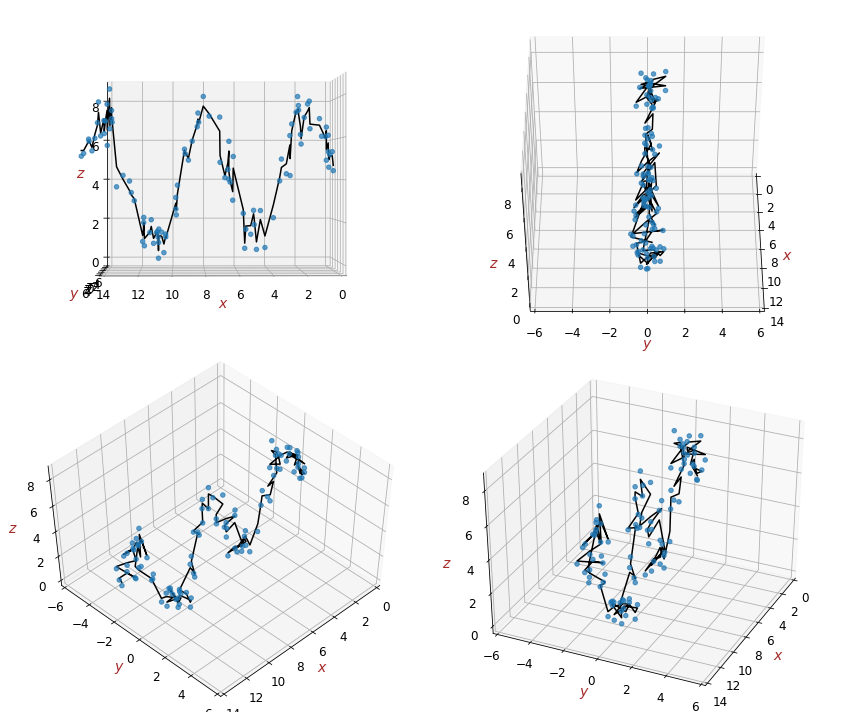

In [22]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

### Create Optimal DecisionTreeRegressor Model

In [23]:
# instantiating new optimal DecisionTreeRegressor model with best parameter attributes
optimal_dtr = DecisionTreeRegressor(random_state=42, max_depth = refined_dt.best_params_['max_depth'], 
                                        splitter = refined_dt.best_params_['splitter'],
                                        min_samples_split = refined_dt.best_params_['min_samples_split'])

fit_x = X_train['x'].to_numpy()
fit_y = X_train['y'].to_numpy()

# fitting the new optimal model
optimal_dtr.fit(X_train, z_train) 
fit_z = optimal_dtr.predict(X_train)

w=np.argsort(fit_x)
fit_x=fit_x[w]
fit_y=fit_y[w]
fit_z=fit_z[w]

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

Saving figure Image2


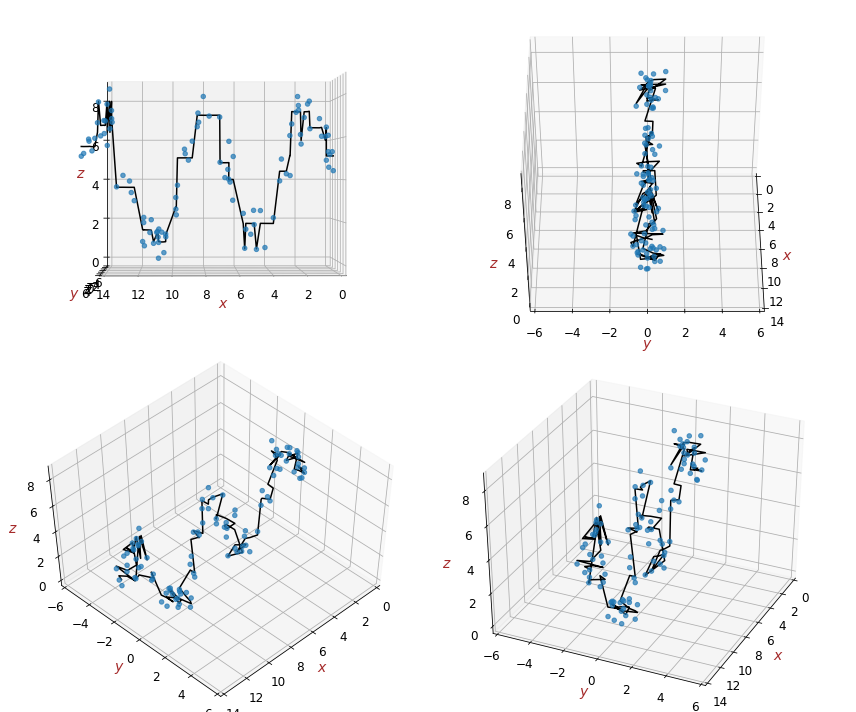

In [24]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Compute Generalization Error

Here we compute the generalization error for each of the optimal models computed above. I used MSE as the generalization error metric. I rounded the calculated errors to four significant digits. I then printed the generalization error for all three models.

In [26]:
from sklearn.metrics import mean_squared_error

z_pred_test = optimal_gbr.predict(X_test)
z_pred_rfr_test = optimal_rfr.predict(X_test)
z_pred_dtr_test = optimal_dtr.predict(X_test)

# generalization error for test sets
print('The generalization error for the optimal GradientBoostingRegression model is', round(mean_squared_error(y_true=z_test, y_pred=z_pred_test), 4))
print('The generalization error for the optimal RandomForestRegression model is', round(mean_squared_error(y_true=z_test, y_pred=z_pred_rfr_test), 4))
print('The generalization error for the optimal DecisionTreeRegression model is', round(mean_squared_error(y_true=z_test, y_pred=z_pred_dtr_test), 4))

The generalization error for the optimal GradientBoostingRegression model is 0.4397
The generalization error for the optimal RandomForestRegression model is 0.5476
The generalization error for the optimal DecisionTreeRegression model is 0.7264


#### The best model for this dataset is the Gradient Boosting Regression model.